In [2]:
import sounddevice as sd # type: ignore
import acoular as ac # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from datetime import datetime
from config import uma16_index # type: ignore
import time

/home/rabea/micromamba/envs/ba/lib/python3.11/site-packages/acoular/h5files.py:5: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config
2024-08-19 11:03:03.210325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 11:03:03.210393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 11:03:03.211551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attemptin

In [3]:
device_index = uma16_index()
folder = "uma16_example_recordings/"

dev = ac.SoundDeviceSamplesGenerator(
    device=device_index, 
    numchannels=16,
)

recording_time = 1 
dev.numsamples = int(recording_time * dev.sample_freq)

time.sleep(1)
signal = ac.tools.return_result(dev, num=256)

t = np.arange(signal.shape[0]) / dev.sample_freq
fs = dev.sample_freq #Abtastrate
df = 1/fs #Zeitabstand zwischen den Samples


UMA-16 device: nanoSHARC micArray16 UAC2.0: USB Audio (hw:3,0) at index 5

{'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:3,0)', 'index': 5, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0} 44100.0


In [4]:
print("Shape:", signal.shape)
print("Number of Samples:", dev.numsamples)
print("Calculate back the recording time:", signal.shape[0] / dev.sample_freq)

Shape: (44100, 16)
Number of Samples: 44100
Calculate back the recording time: 1.0


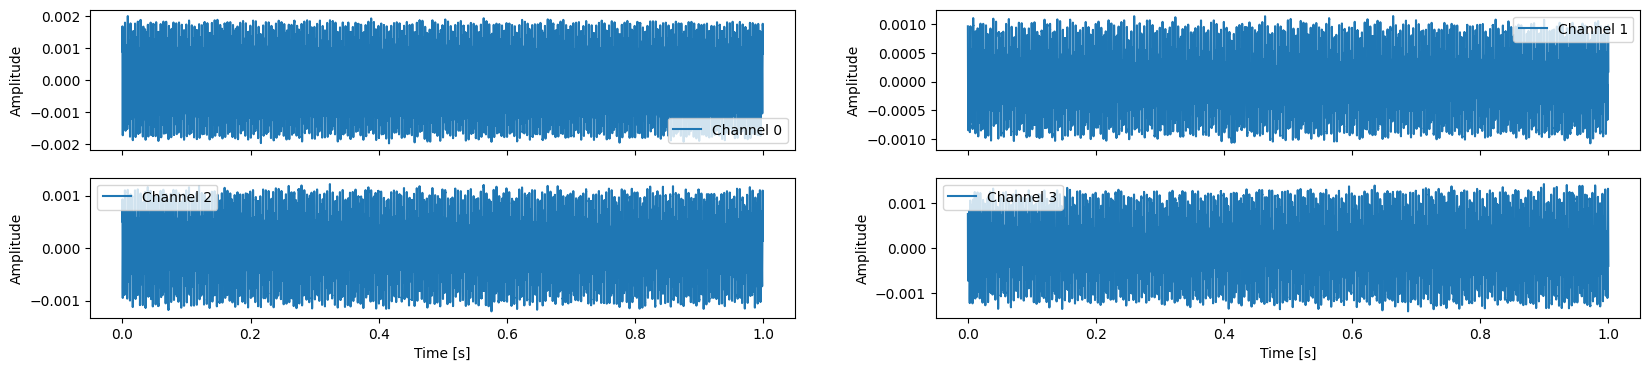

In [5]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20,4))
for i in range(4):
    row = i // 2
    col = i % 2
    axs[row, col].plot(t, signal[:, i], label=f"Channel {i}")
    axs[row, col].set_ylabel("Amplitude")
    axs[row, col].legend()
axs[1, 0].set_xlabel("Time [s]")
axs[1, 1].set_xlabel("Time [s]")
plt.show()

In [9]:
hdf5_filename = folder + "450_and_700_1s_acoular.h5"
# TODO herausfinden, wie man das richtig abspeichert (aber vielleicht auch erstmal egal)
hdf5 = ac.WriteH5(
    source=dev,
    name=hdf5_filename,
)

hdf5.save()

{'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:3,0)', 'index': 5, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0} 44100.0


In [10]:
import h5py

hdf5_filename = folder + "450_and_700_1s_h5py.h5"

# Öffne die Datei im Schreibmodus
with h5py.File(hdf5_filename, 'w') as hdf5_file:
    hdf5_file.create_dataset('data', data=signal)
    hdf5_file.attrs['sample_freq'] = dev.sample_freq
    hdf5_file.attrs['channels'] = 16


In [11]:
with h5py.File(hdf5_filename, 'r') as hdf5_file:
    signal = hdf5_file['data'][:]
    sample_freq = hdf5_file.attrs['sample_freq']
    channels = hdf5_file.attrs['channels']

print("Loaded signal shape:", signal.shape)
print("Sample freq:", sample_freq)
print("Number of channels:", channels)

Loaded signal shape: (44100, 16)
Sample freq: 44100.0
Number of channels: 16


In [ ]:
wav_filename = folder + "450_700.wav"

wav = ac.WriteWAV(
    source=dev,
    name=wav_filename,
    channels=[0],
)

wav.save()

{'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:3,0)', 'index': 5, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0} 44100.0
{'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:3,0)', 'index': 5, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0} 44100.0
